# Getting to know your data

Today we will learn how to get to know the data by using statistic methods and visualization.<br>
We will use two visualization libraries: matplotlib and seaborn.

### Import and style settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for inline plots in jupyter
%matplotlib inline 

In [3]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

 Read  the data to df from a csv file

In [4]:
df = pd.read_csv("./data/titanic.csv")

First we will get to know the data: the data type of each column and shape.

In [5]:
print("Shape: ", df.shape)
df.head()

Shape:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


What is the type of each attribute?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,234,147,3
top,NaN,NaN,NaN,"Gustafsson, Mr. Johan Birger",male,NaN,NaN,NaN,347082,$8.05,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,43,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,NaN,NaN,NaN


From the information above we can learn about missing values, attributes data type and unmatched data type.
- Missing values: for the attributes 'Age', 'Cabin' and 'Embarked'.
- Unmatched data type: for the attribute 'Fare' the data type is object and it should be a numeric ,we need to convert it.

Convert 'Fare' columns to numeric:

In [8]:
df['Fare'] = df['Fare'].str.extract('(\d+\.?\d*)', expand = True).astype(float)
df["Fare"].dtype

dtype('float64')

Split 'Cabin' column to sign and value:

In [9]:
df[['Cabin_sign', 'Cabin_value']] = df['Cabin'].str.extract('([A-Za-z]+)(\d+\.?\d*)', expand = True)
df['Cabin_value'] = df['Cabin_value'].astype(float)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_sign,Cabin_value
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,C,85.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,C,123.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,NaN,NaN


In [11]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_sign,Cabin_value
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,200,200.00000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,7,NaN
top,NaN,NaN,NaN,"Gustafsson, Mr. Johan Birger",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,C,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,59,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.205017,NaN,NaN,NaN,50.49000
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693389,NaN,NaN,NaN,35.39497
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,2.00000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.915000,NaN,NaN,NaN,22.00000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.450000,NaN,NaN,NaN,43.00000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,77.25000


### Split to attributes and taget

In [12]:
target =pd.DataFrame(df['Survived']) 
data = df.drop(['PassengerId', 'Survived'], axis=1)

### Split to nominal and numerical attributes

In [13]:
numeric_col = data.describe().columns # to get the numeric column
numeric_col

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_value'], dtype='object')

In [14]:
numeric_data = data[numeric_col]
nominal_data = data.drop(numeric_col, axis=1)

## Numerical data

For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

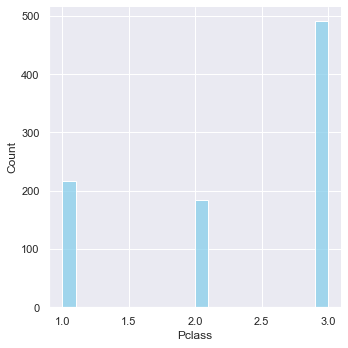

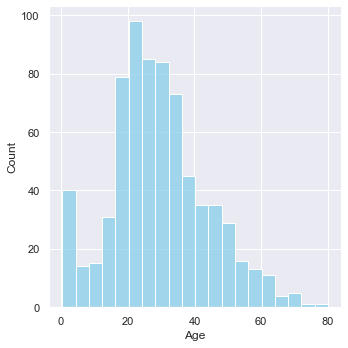

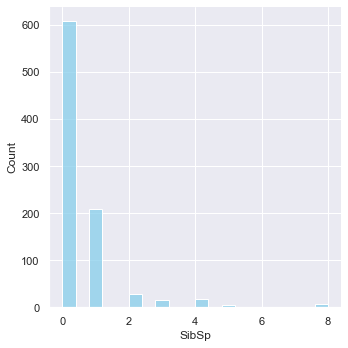

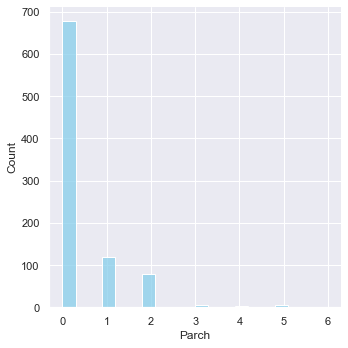

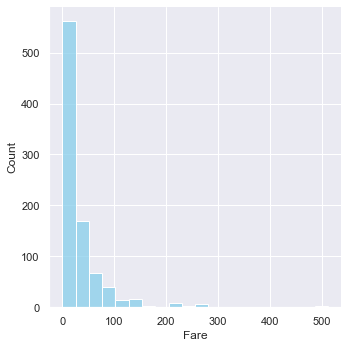

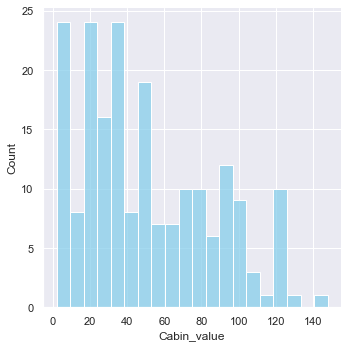

In [15]:
for col in numeric_col:
    sns.displot(numeric_data[col], bins=20, color='skyblue') # kde=True

From the histograms above it looks like 'Age' is normal distributed whereas the other attributes are not. Moreover, we can see that 'Pclass', 'SibSp' and 'Parch' has only few values with importance to the order i.e. it's a categorical ordinal attribute.

#### Skweness

In [16]:
for col in ['Age', 'Fare', 'Cabin_value']:
    print(col, ' skewness:', numeric_data[col].skew(axis = 0, skipna = True) )

Age  skewness: 0.38910778230082704
Fare  skewness: 4.787343284242712
Cabin_value  skewness: 0.6078869117116775


As we can see at the graphs and from the skweness calculation, the 'fare' column have long right tail that indicate on asymmrtric distribution while 'Age' and 'Cabin_value' are more symmetric.

We can also look at the probability

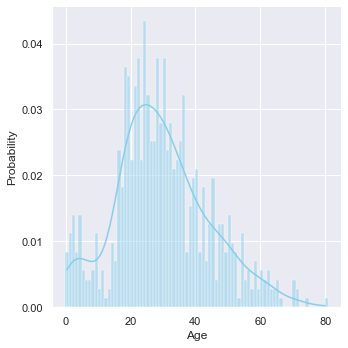

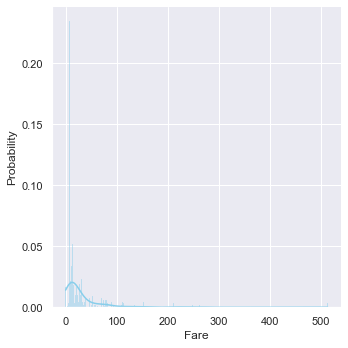

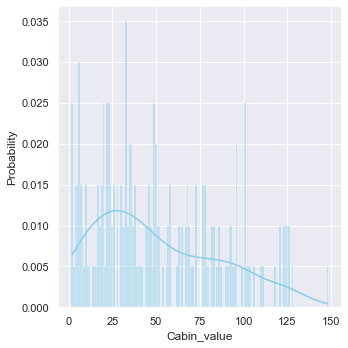

In [17]:
for col in ['Age', 'Fare', 'Cabin_value']:
    sns.displot(numeric_data[col], kde=True, color='skyblue', stat="probability", discrete=True )

Check the values in 'Fare'

In [18]:
print('min', numeric_data['Fare'].min())
print('max', numeric_data['Fare'].max())
print('values over 300', numeric_data[numeric_data['Fare']>300].shape)
print('values under 10', numeric_data[numeric_data['Fare']<10].shape)

min 0.0
max 512.33
values over 300 (3, 6)
values under 10 (336, 6)


Maybe there are outliers?

### Categorial attributes

In [19]:
cat_col = ['Pclass', 'SibSp','Parch']

In [20]:
for col in cat_col:
    print(col, ' values: ')
    print(numeric_data[col].value_counts().sort_index())
    print('-----------------------------')

Pclass  values: 
1    216
2    184
3    491
Name: Pclass, dtype: int64
-----------------------------
SibSp  values: 
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
-----------------------------
Parch  values: 
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64
-----------------------------


#### Statistic information:
Describe function show statistic information for numerical data.

In [21]:
numeric_data.describe() 

,Pclass,Age,SibSp,Parch,Fare,Cabin_value
count,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,2.308642,29.699118,0.523008,0.381594,32.205017,50.49000
std,0.836071,14.526497,1.102743,0.806057,49.693389,35.39497
min,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,2.000000,20.125000,0.000000,0.000000,7.915000,22.00000
50%,3.000000,28.000000,0.000000,0.000000,14.450000,43.00000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,3.000000,80.000000,8.000000,6.000000,512.330000,148.00000


<AxesSubplot:ylabel='Age'>

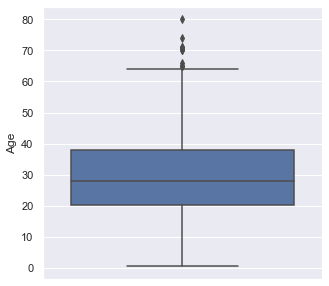

In [22]:
sns.boxplot(y="Age", data=df)

In [23]:
fare_up_to_100 = numeric_data[numeric_data['Fare']<=100]['Fare']

<AxesSubplot:ylabel='Fare'>

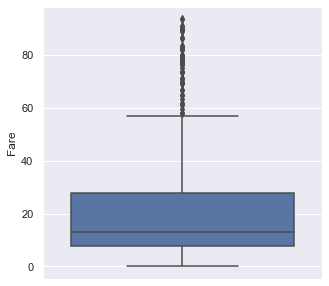

In [24]:
sns.boxplot(y=fare_up_to_100)

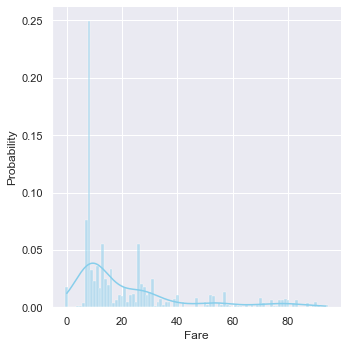

In [25]:
sns.displot(fare_up_to_100, kde=True, color='skyblue', stat="probability", discrete=True )

## Nominal data

For nominal data we would like to know how many unique values there are and the distribution.

In [26]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        891 non-null    object
 1   Sex         891 non-null    object
 2   Ticket      891 non-null    object
 3   Cabin       204 non-null    object
 4   Embarked    889 non-null    object
 5   Cabin_sign  200 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Describe function for nomiunal data show information about unique value, top value and the top value frequency.

In [27]:
describe_df = nominal_data.describe()
describe_df

,Name,Sex,Ticket,Cabin,Embarked,Cabin_sign
count,891,891,891,204,889,200
unique,891,2,681,147,3,7
top,"Gustafsson, Mr. Johan Birger",male,347082,B96 B98,S,C
freq,1,577,7,4,644,59


Adding the top value frequency in percent.

In [28]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/891, decimals=3))
describe_df

,Name,Sex,Ticket,Cabin,Embarked,Cabin_sign
count,891,891,891,204,889,200
unique,891,2,681,147,3,7
top,"Gustafsson, Mr. Johan Birger",male,347082,B96 B98,S,C
freq,1,577,7,4,644,59
%freq,0.001,0.648,0.008,0.004,0.723,0.066


#### Histograms
The columns 'Name", 'Ticket' and 'Cabin' have to many unique values so there is no reason to look on their histograms.

Handale missing values - fill in 'N' just to be able to see the histograms.

In [29]:
nominal_data = nominal_data.fillna('NA')

In [30]:
nominal_data['Embarked'].value_counts()

S     644
C     168
Q      77
NA      2
Name: Embarked, dtype: int64

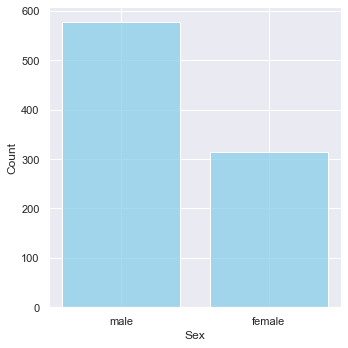

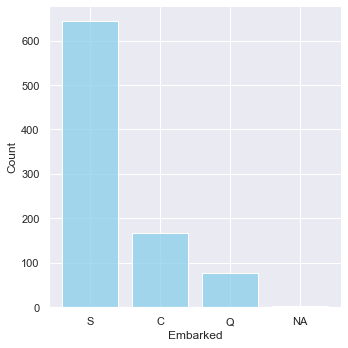

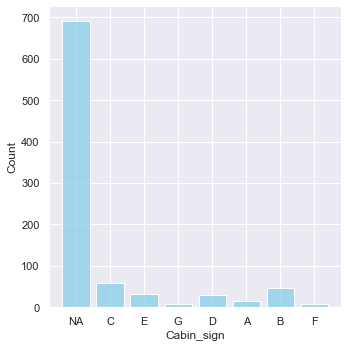

In [31]:
dist_col = ['Sex', 'Embarked', 'Cabin_sign']
for col in dist_col:
    sns.displot(nominal_data, x=col, shrink=.8, color='skyblue')

## Target

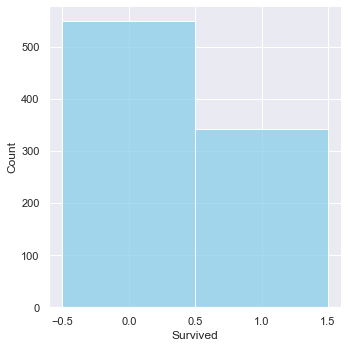

In [32]:
sns.displot(target, x='Survived', color='skyblue', discrete=True)

#### Pie chart

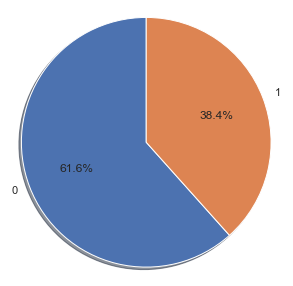

In [33]:
fig1, ax1 = plt.subplots()
ax1.pie(target['Survived'].value_counts(), labels=target['Survived'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

### Exploring the behavior of the attributes according to the target values

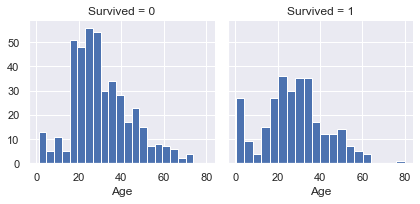

In [34]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

#### Scatter plot

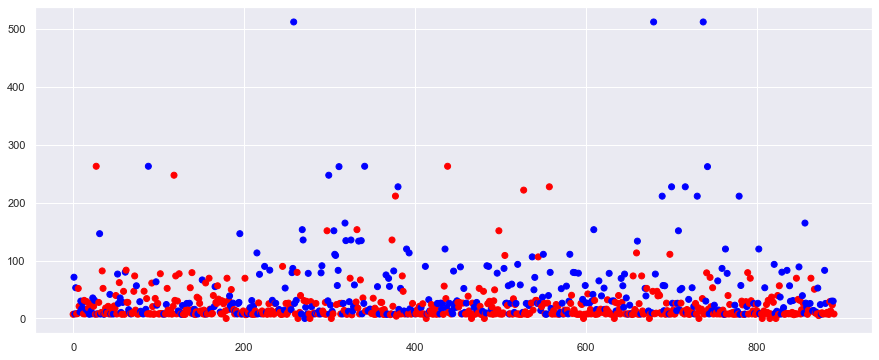

In [35]:
colordict = {0: 'red', 1: 'blue'}

plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['Fare'], c = df['Survived'].map(colordict))

#### Boxplot graph 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

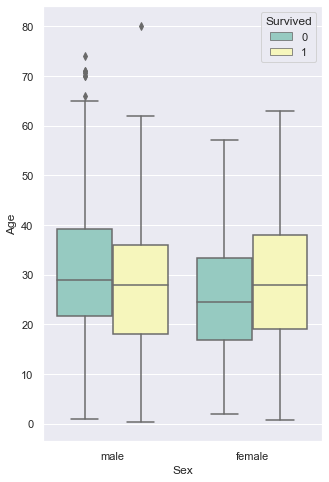

In [36]:
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="Age", x="Sex", hue= "Survived", data=df, palette="Set3")